<a href="https://colab.research.google.com/github/Meshal-Css/my-project-/blob/main/Demographica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
! pip install pandas geopandas matplotlib

In [15]:
! pip install arabic-reshaper python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 6.1 MB/s eta 0:00:00


In [21]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
import geopandas as gpd

In [26]:
!pip install geopandas
!wget https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
!unzip ne_110m_admin_0_countries.zip

import geopandas as gpd

# Load the downloaded shapefile
world = gpd.read_file("/content/ne_10m_admin_1_states_provinces.zip")

--2024-11-27 19:06:31--  https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
Resolving www.naturalearthdata.com (www.naturalearthdata.com)... 50.87.253.14
Connecting to www.naturalearthdata.com (www.naturalearthdata.com)|50.87.253.14|:443... connected.
HTTP request sent, awaiting response... 500 Internal Server Error
2024-11-27 19:06:31 ERROR 500: Internal Server Error.

unzip:  cannot find or open ne_110m_admin_0_countries.zip, ne_110m_admin_0_countries.zip.zip or ne_110m_admin_0_countries.zip.ZIP.


In [3]:
# USE DATA
DATA = pd.read_csv('/content/PopulationbyNationalitybyRegionGovernorateCityandNationalityARCSV.csv')

In [4]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48878 entries, 0 to 48877
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   الجنسية   48878 non-null  object
 1   المحافظة  48878 non-null  object
 2   المدينة   48878 non-null  object
 3   المنطقة   48878 non-null  object
 4   النوع     48878 non-null  object
 5   السكان    48878 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.2+ MB


In [5]:
DATA.head()

,الجنسية,المحافظة,المدينة,المنطقة,النوع,السكان
0,سعودي,ميسان,(القان) ابوضروه,مكة المكرمة,أنثى,8
1,سعودي,ميسان,(القان) ابوضروه,مكة المكرمة,ذكر,9
2,سعودي,المهد,آبار البدايع,المدينة المنورة,أنثى,17
3,سعودي,المهد,آبار البدايع,المدينة المنورة,ذكر,8
4,سعودي,المهد,آبار الخبره,المدينة المنورة,ذكر,7


In [7]:
# # Check columns and unique values
print("الجنسية:", DATA['الجنسية'].unique())
print("المحافظة:", DATA['المحافظة'].unique())
print("النوع:", DATA['النوع'].unique())

الجنسية: ['سعودي' 'غير سعودي']
المحافظة: ['ميسان' 'المهد' 'الحائط' 'ينبع' 'المدينة المنورة (مقر الامارة)' 'السليمي'
 'ابها (مقر الإمارة)' 'الحرجة' 'فيفا' 'الدائر' 'النماص' 'سراة عبيدة'
 'حوطة بنى تميم' 'خميس  مشيط' 'بارق' 'احد رفيدة' 'العرضيات' 'طريب' 'بيشة'
 'محايل' 'المجاردة' 'تنومة' 'بالقرن' 'المخواة' 'تثليث' 'وادى الدواسر'
 'الطائف' 'هروب' 'القويعية' 'بدر' 'الشنان' 'ابو عريش' 'صامطة' 'العارضة'
 'العيدابي' 'النبهانية' 'الدوادمي' 'أضم' 'البرك' 'الليث' 'الحجرة' 'العقيق'
 'القرى' 'المندق' 'بلجرشي' 'بني حسن' 'فرعة غامد الزناد' 'قلوة' 'القريات'
 'دومة الجندل' 'سكاكا (مقر الامارة)' 'طبرجل' 'العويقيلة' 'رفحاء'
 'عرعر (مقر الامارة)' 'الافلاج' 'الحريق' 'الخرج' 'الدرعية' 'الدلم'
 'الرياض (مقر الامارة)' 'الرين' 'الزلفي' 'السليل' 'الغاط' 'المجمعة'
 'المزاحمية' 'ثادق' 'حريملاء' 'رماح' 'شقراء' 'ضرما' 'عفيف' 'مرات'
 'الأسياح' 'البدائع' 'البكيرية' 'الرس' 'الشماسية' 'المذنب'
 'بريدة (مقرالامارة)' 'رياض الخبراء' 'ضرية' 'عقلة الصقور' 'عنيزة'
 'عيون الجواء' 'الحناكية' 'العلا' 'العيص' 'خيبر' 'وادي الفرع

In [10]:
# Check the largest cities by population
top_cities = DATA.groupby('المدينة')['السكان'].sum().sort_values(ascending=False).head(20)
print("أكبر المدن:", top_cities)

أكبر المدن: المدينة
الرياض             6924704
جدة                3712917
مكة المكرمة        2385509
المدينة المنورة    1411599
الدمام             1386166
تبوك                594350
بريدة               571365
الطائف              563433
خميس مشيط           535065
حائل                448623
الهفوف              430415
الخبر               409549
حفر الباطن          387096
نجران               381431
ابها                334290
الجبيل              312646
المبرز              299855
الخرج               295568
ينبع                258777
الثقبه              248888
Name: السكان, dtype: int64


In [17]:
def reshape_text(text):
    reshaped = arabic_reshaper.reshape(text)
    return get_display(reshaped)

In [18]:
top_cities.index = [reshape_text(city) for city in top_cities.index]

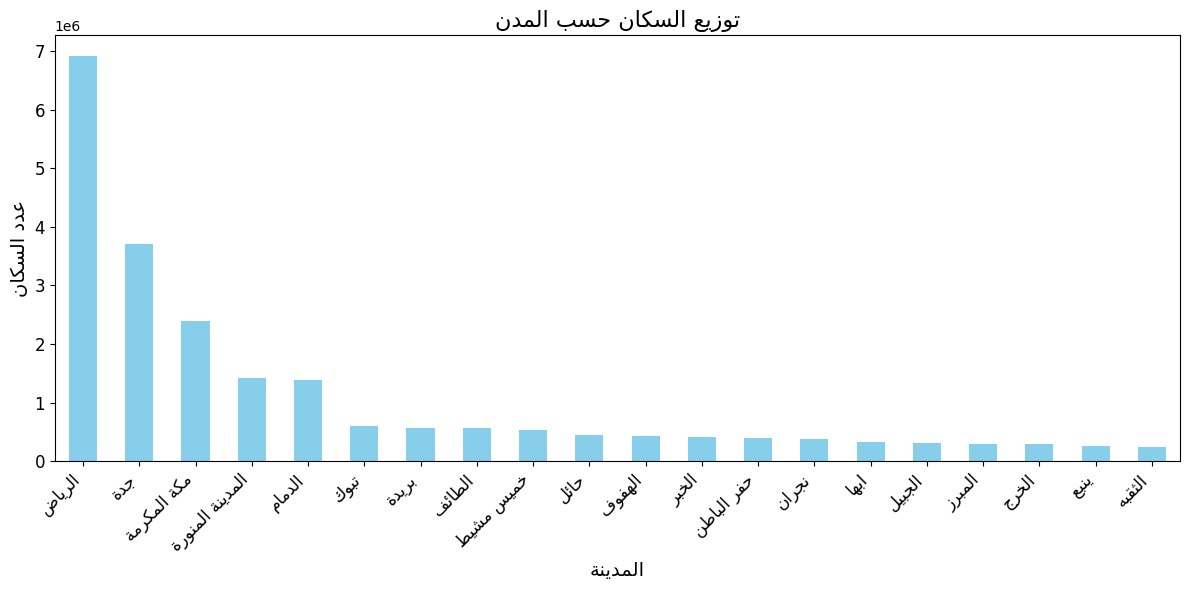

In [19]:
top_cities.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title(reshape_text('توزيع السكان حسب المدن'), fontsize=16)
plt.ylabel(reshape_text('عدد السكان'), fontsize=14)
plt.xlabel(reshape_text('المدينة'), fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()

In [32]:
population_by_city = DATA.groupby('المدينة')['السكان'].sum().reset_index()
population_by_city.columns = ['City', 'Population']

In [36]:
# URL
world = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')

In [4]:
import folium


cities_data = {
    "الرياض": (24.7136, 46.6753, 6924704),
    "جدة": (21.4858, 39.1925, 3712917),
    "مكة المكرمة": (21.3891, 39.8579, 2385509),
    "المدينة المنورة": (24.5247, 39.5692, 1411599),
    "الدمام": (26.4207, 50.0888, 1386166),
    "تبوك": (28.3838, 36.5662, 594350),
    "بريدة": (26.3260, 43.9750, 571365),
    "الطائف": (21.2854, 40.4264, 563433),
    "خميس مشيط": (18.3090, 42.7939, 535065),
    "حائل": (27.5114, 41.7208, 448623)
}


saudi_map = folium.Map(location=[23.8859, 45.0792], zoom_start=6)


for city, (lat, lon, population) in cities_data.items():
    folium.CircleMarker(
        location=[lat, lon],
        radius=population / 1000000,  # حجم الدائرة بناءً على عدد السكان
        popup=f"<b>{city}</b><br>عدد السكان: {population:,} نسمة",
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(saudi_map)


output_file = "saudi_population_map.html"
saudi_map.save(output_file)
print(f"تم إنشاء الخريطة وحفظها في الملف: {output_file}")


تم إنشاء الخريطة وحفظها في الملف: saudi_population_map.html


In [5]:
import folium


cities_data = {
    "الرياض": (24.7136, 46.6753, 6924704, "سعوديون: 60%, غير سعوديون: 40%", "ذكور: 51%, إناث: 49%"),
    "جدة": (21.4858, 39.1925, 3712917, "سعوديون: 55%, غير سعوديون: 45%", "ذكور: 53%, إناث: 47%"),
    "مكة المكرمة": (21.3891, 39.8579, 2385509, "سعوديون: 50%, غير سعوديون: 50%", "ذكور: 52%, إناث: 48%"),
    "المدينة المنورة": (24.5247, 39.5692, 1411599, "سعوديون: 65%, غير سعوديون: 35%", "ذكور: 54%, إناث: 46%"),
    "الدمام": (26.4207, 50.0888, 1386166, "سعوديون: 70%, غير سعوديون: 30%", "ذكور: 50%, إناث: 50%"),
    "تبوك": (28.3838, 36.5662, 594350, "سعوديون: 80%, غير سعوديون: 20%", "ذكور: 51%, إناث: 49%"),
    "بريدة": (26.3260, 43.9750, 571365, "سعوديون: 85%, غير سعوديون: 15%", "ذكور: 52%, إناث: 48%"),
    "الطائف": (21.2854, 40.4264, 563433, "سعوديون: 75%, غير سعوديون: 25%", "ذكور: 53%, إناث: 47%"),
    "خميس مشيط": (18.3090, 42.7939, 535065, "سعوديون: 60%, غير سعوديون: 40%", "ذكور: 50%, إناث: 50%"),
    "حائل": (27.5114, 41.7208, 448623, "سعوديون: 90%, غير سعوديون: 10%", "ذكور: 55%, إناث: 45%")
}


saudi_map = folium.Map(location=[23.8859, 45.0792], zoom_start=6)


for city, (lat, lon, population, nationality, gender) in cities_data.items():
    popup_content = f"""
    <h4>معلومات عن {city}</h4>
    <p><b>عدد السكان:</b> {population:,} نسمة</p>
    <p><b>الجنسية:</b> {nationality}</p>
    <p><b>الجنس:</b> {gender}</p>
    """
    folium.Marker(
        location=[lat, lon],
        popup=folium.Popup(popup_content, max_width=300),
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(saudi_map)


output_file = "saudi_population_info_map.html"
saudi_map.save(output_file)
print(f"تم إنشاء الخريطة وحفظها في الملف: {output_file}")


تم إنشاء الخريطة وحفظها في الملف: saudi_population_info_map.html


In [6]:
import plotly.express as px
import pandas as pd


data = {
    "المدينة": ["الرياض", "جدة", "مكة المكرمة", "المدينة المنورة", "الدمام", "تبوك", "بريدة", "الطائف", "خميس مشيط", "حائل"],
    "عدد السكان": [6924704, 3712917, 2385509, 1411599, 1386166, 594350, 571365, 563433, 535065, 448623],
    "نسبة السعوديين": [60, 55, 50, 65, 70, 80, 85, 75, 60, 90]  # كنسبة مئوية
}


df = pd.DataFrame(data)


df["عدد غير السعوديين"] = df["عدد السكان"] * (100 - df["نسبة السعوديين"]) / 100


fig = px.bar(
    df,
    x="المدينة",
    y="عدد غير السعوديين",
    text="عدد غير السعوديين",
    title="عدد غير السعوديين في كل مدينة",
    labels={"عدد غير السعوديين": "عدد غير السعوديين", "المدينة": "المدينة"},
    color="عدد غير السعوديين",
    color_continuous_scale="Viridis"
)


fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')
fig.update_layout(
    xaxis_title="المدينة",
    yaxis_title="عدد غير السعوديين",
    title_x=0.5
)


fig.show()
